In [1]:
import pandas_datareader.data as webdata
import datetime
import pandas as pd
import yfinance

In [2]:
yfinance.pdr_override()

In [3]:
start_day = datetime.datetime(2020, 1, 1)
end_day = datetime.datetime(2020, 3, 18)

In [4]:
data = webdata.get_data_yahoo('601318.ss', start_day, end_day)
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  85.900002  86.790001  85.879997  86.120003  72.726860  77825207
2020-01-03  86.809998  86.879997  85.900002  86.199997  72.794411  59498001
2020-01-06  85.919998  86.870003  85.500000  85.599998  72.287727  63644804
2020-01-07  86.010002  86.459999  85.669998  86.150002  72.752190  45218832
2020-01-08  85.000000  85.000000  85.000000  85.000000  71.781029  62805311


In [21]:
data['diff'] = data['Close'].diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2020-01-02,85.900002,86.790001,85.879997,86.120003,72.726868,77825207,NaN
2020-01-03,86.809998,86.879997,85.900002,86.199997,72.794411,59498001,0.079994
2020-01-06,85.919998,86.870003,85.500000,85.599998,72.287720,63644804,-0.599998
2020-01-07,86.010002,86.459999,85.669998,86.150002,72.752197,45218832,0.550003
2020-01-08,85.000000,85.000000,85.000000,85.000000,71.781036,62805311,-1.150002


In [22]:
import numpy as np
data['Signal'] = np.where(data['diff'] > 0, 1, 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff,Signal
Date,,,,,,,,
2020-01-02,85.900002,86.790001,85.879997,86.120003,72.726868,77825207,NaN,0
2020-01-03,86.809998,86.879997,85.900002,86.199997,72.794411,59498001,0.079994,1
2020-01-06,85.919998,86.870003,85.500000,85.599998,72.287720,63644804,-0.599998,0
2020-01-07,86.010002,86.459999,85.669998,86.150002,72.752197,45218832,0.550003,1
2020-01-08,85.000000,85.000000,85.000000,85.000000,71.781036,62805311,-1.150002,0


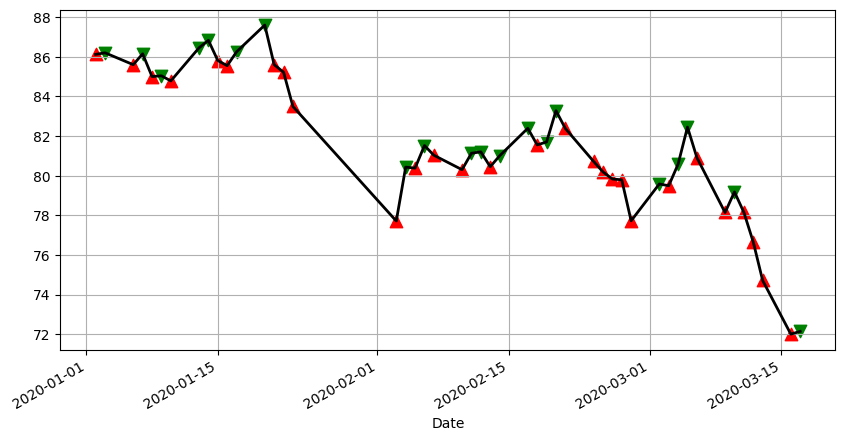

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data['Close'].plot(linewidth=2, color='k', grid=True)
plt.scatter(data['Close'].loc[data.Signal==1].index, data['Close'][data.Signal==1], marker='v', s=80, c='g')
plt.scatter(data['Close'].loc[data.Signal==0].index, data['Close'][data.Signal==0], marker='^', s=80, c='r')
plt.show()